In [1]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2)

circuit.x(0)

circuit.cx(0, 1)

circuit.measure([0, 1], [0, 1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

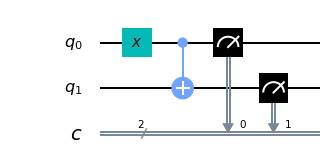

In [2]:
circuit.draw(output='mpl')

In [3]:
from qiskit import IBMQ

IBMQ.save_account(open("token.txt", 'r').read())

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
    

ibmq_qasm_simulator has 2 queued and simulated qubits
ibmqx2 has 12 queued and 5 qubits
ibmq_16_melbourne has 5 queued and 15 qubits
ibmq_vigo has 4 queued and 5 qubits
ibmq_ourense has 3 queued and 5 qubits
ibmq_valencia has 5 queued and 5 qubits
ibmq_london has 2 queued and 5 qubits
ibmq_burlington has 5 queued and 5 qubits
ibmq_essex has 29 queued and 5 qubits
ibmq_armonk has 120 queued and 1 qubits


In [10]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_16_melbourne")
job = q.execute(circuit, backend = backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


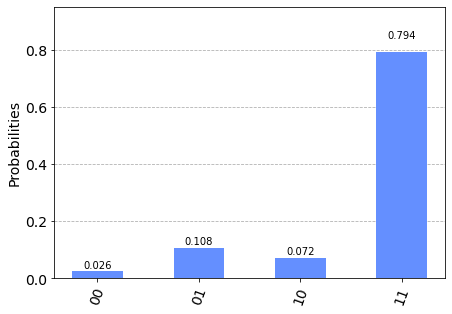

In [12]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [13]:
circuit = q.QuantumCircuit(2,2)

circuit.x(0)

circuit.cx(0, 1)

circuit.measure([0, 1], [0, 1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [14]:
circuit = q.QuantumCircuit(2,2)

circuit.h(0)

circuit.cx(0, 1)

circuit.measure([0, 1], [0, 1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [15]:
job = q.execute(circuit, backend = backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


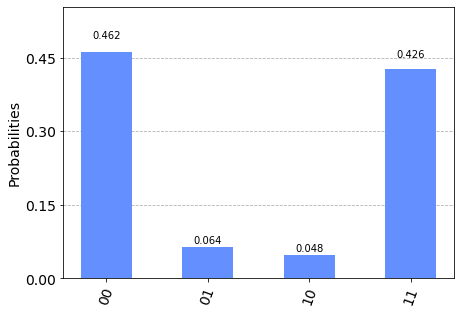

In [17]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [18]:
backend = provider.get_backend("ibmq_qasm_simulator")

job = q.execute(circuit, backend = backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


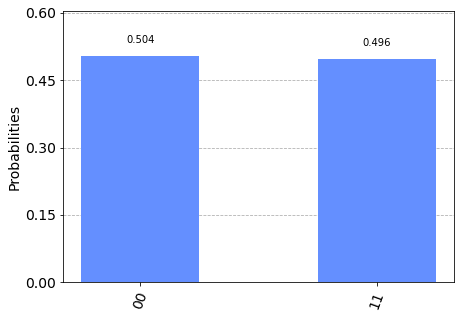

In [19]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])